In [1]:
import os
if  not 'juxtorpus' in os.listdir():
    os.chdir('../../')
assert 'juxtorpus' in os.listdir(), f"Working directory should be at juxtorpus. But at {os.getcwd()}"
f"Working directory: {os.getcwd()}"

'Working directory: /Users/hcha9747/workspace/juxtorpus'

In [2]:
from juxtorpus.corpus import CorpusBuilder, Corpus
builder = CorpusBuilder('/Users/hcha9747/Downloads/widgets/Sample_Auspol_Tweets.csv')
builder.set_text_column('text')
builder.add_metas('created_at', 'datetime')
corpus = builder.build()

# WordCloud

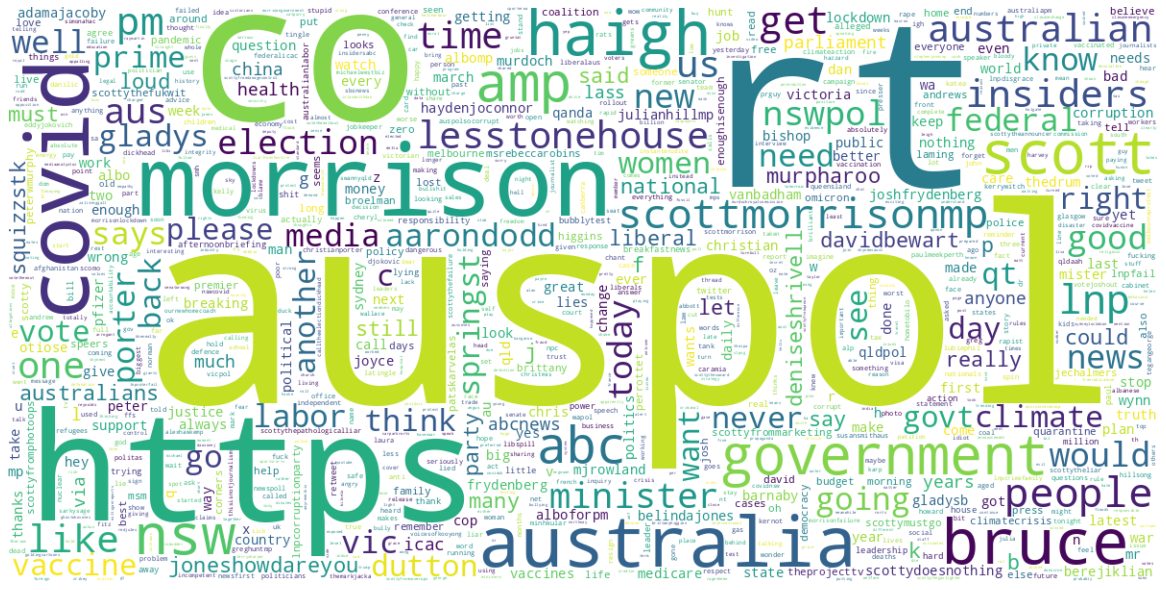

In [9]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from nltk.corpus import stopwords

def wordcloud(corpus: Corpus):
    wc = WordCloud(background_color='white', max_words=1000, height=600, width=1200)
    wc_default_h, wc_default_w = wc.height, wc.width
    
    counter = Counter(corpus.generate_words())
    for sw in stopwords.words('english'):
        try:
            del counter[sw]
        except:
            continue
            
    h, w = 16, 16*1.5
    
    wc.generate_from_frequencies(counter)

    plt.figure(figsize=(h, w))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()
    
wordcloud(corpus)

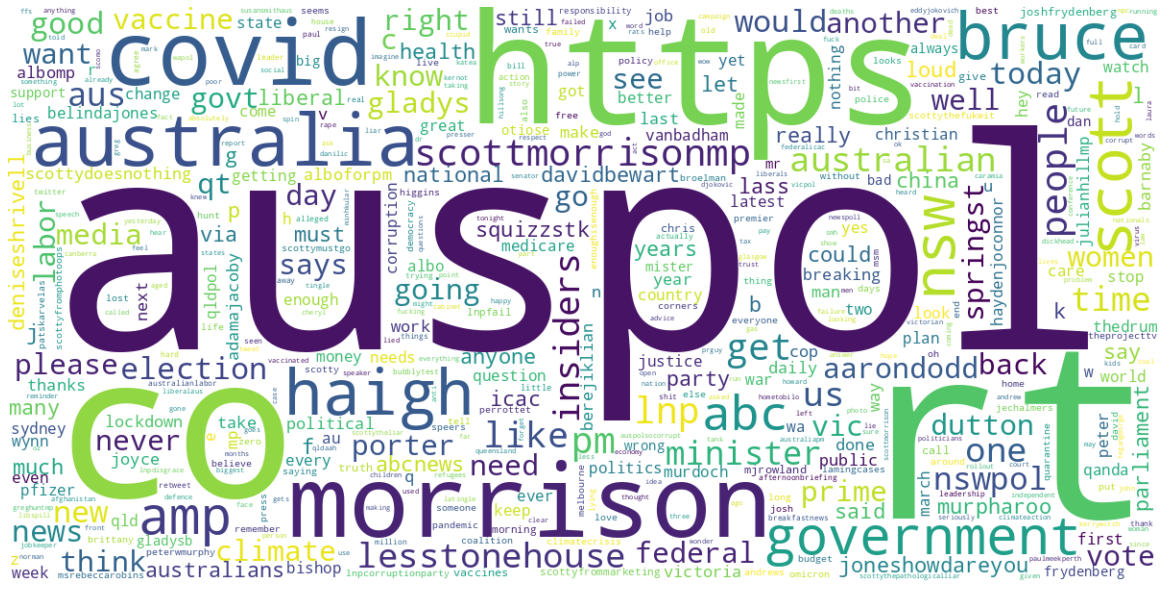

In [10]:
from juxtorpus.viz.corpus import wordcloud

wordcloud(corpus)

# Timeline

In [10]:
import pandas as pd

def timeline(corpus: Corpus, datetime_meta_id: str, freq: str):
    meta = corpus.meta.get_or_raise_err(datetime_meta_id)
    groups = meta.series().groupby(meta.series(), pd.Grouper(freq=freq))
    groups.plot()
    
    
meta = corpus.meta.get_or_raise_err('created_at')
groups = meta.series().groupby(level=0, pd.Grouper(level=0, freq='1w'))
groups.size()

SyntaxError: positional argument follows keyword argument (1556164615.py, line 10)

<AxesSubplot:xlabel='created_at'>

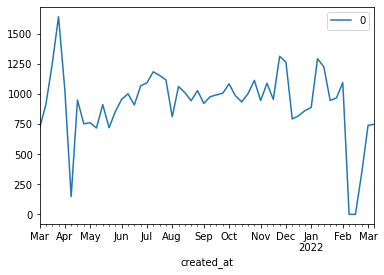

In [23]:
meta = corpus.meta.get_or_raise_err('created_at')
df = pd.DataFrame([False]*len(meta.series()), index=meta.series())
df.groupby(pd.Grouper(level=0, freq='1w')).count().plot()